<a href="https://colab.research.google.com/github/mel0ca/Traffic-Analysis/blob/main/IVT-Pattern-Across-App-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://drive.google.com/uc?export=download&id=1hCwJYx7xyeCo0zXepWGJJwgGPCsXzJqx"
df = pd.read_csv(url)

print("Loaded Data")
df.head()

Loaded Data


,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,2025-09-11 14:00:00,14361,14354,158,21888,1.524128,0,0,1.000488,90.892405,0.000000
1,2025-09-11 15:00:00,9305,9303,115,10019,1.076733,0,0,1.000215,80.913043,0.000000
2,2025-09-11 16:00:00,11985,11981,144,12869,1.073759,0,0,1.000334,83.229167,0.000000
3,2025-09-11 17:00:00,11252,11250,127,12057,1.071543,0,0,1.000178,88.598425,0.008621
4,2025-09-11 18:00:00,10502,10498,103,11363,1.081984,0,0,1.000381,101.961165,0.000000


Data Cleaning: Removing extra spaces

In [10]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

Date to datetime conversion

In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df.head()

,Total Data Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaT,1191603,1189884,28,1770702,1.485983,0,0,1.001445,42557.250000,0.004276
1,2025-09-11,93345,93340,22,99280,1.063581,0,0,1.000054,4242.954545,0.003456
2,2025-09-12,515646,515307,25,649515,1.259614,0,0,1.000658,20625.840000,0.003409
3,2025-09-13,406993,406729,25,473346,1.163032,0,0,1.000649,16279.720000,0.006033
4,2025-09-14,400917,400668,26,467152,1.165209,0,0,1.000621,15419.884620,0.003836


In [13]:
# Checking for Missing values
print(df.isnull().sum())

Date                    0
unique_idfas            0
unique_ips              0
unique_uas              0
total_requests          0
requests_per_idfa       0
impressions             0
impressions_per_idfa    0
idfa_ip_ratio           0
idfa_ua_ratio           0
IVT                     0
dtype: int64


In [14]:

# Checking for Non Null values and Datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  84 non-null     datetime64[ns]
 1   unique_idfas          84 non-null     int64         
 2   unique_ips            84 non-null     int64         
 3   unique_uas            84 non-null     int64         
 4   total_requests        84 non-null     int64         
 5   requests_per_idfa     84 non-null     float64       
 6   impressions           84 non-null     int64         
 7   impressions_per_idfa  84 non-null     int64         
 8   idfa_ip_ratio         84 non-null     float64       
 9   idfa_ua_ratio         84 non-null     float64       
 10  IVT                   84 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 7.3 KB
None


In [15]:
df.describe()

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
count,84,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.0,84.000000,84.000000,84.000000
mean,2025-09-13 07:29:59.999999744,10909.095238,10905.345238,141.892857,11770.202381,1.074001,0.0,0.0,1.000330,77.729143,0.535350
min,2025-09-11 14:00:00,2662.000000,2662.000000,93.000000,2753.000000,1.015625,0.0,0.0,1.000000,21.467742,0.000000
25%,2025-09-12 10:45:00,9027.750000,9024.250000,116.750000,9666.250000,1.052513,0.0,0.0,1.000174,59.609987,0.004818
50%,2025-09-13 07:30:00,10547.000000,10543.000000,144.000000,11402.500000,1.075487,0.0,0.0,1.000329,77.718272,0.979577
75%,2025-09-14 04:15:00,11762.500000,11758.250000,161.250000,12717.250000,1.086343,0.0,0.0,1.000483,95.279174,1.000000
max,2025-09-15 01:00:00,27986.000000,27978.000000,199.000000,30114.000000,1.524128,0.0,0.0,1.000976,149.657754,1.000000
std,NaN,4423.277293,4421.883632,28.853606,4943.227605,0.054346,0.0,0.0,0.000218,25.971076,0.493211


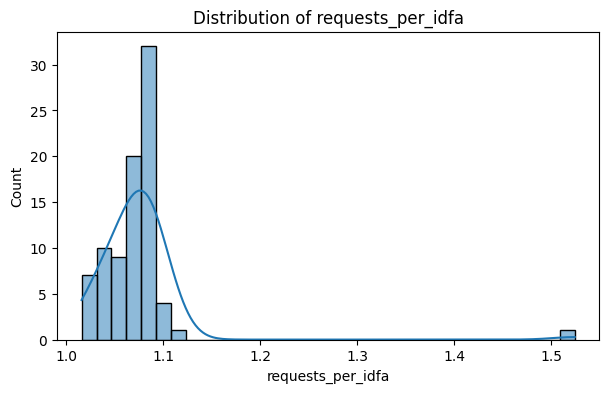

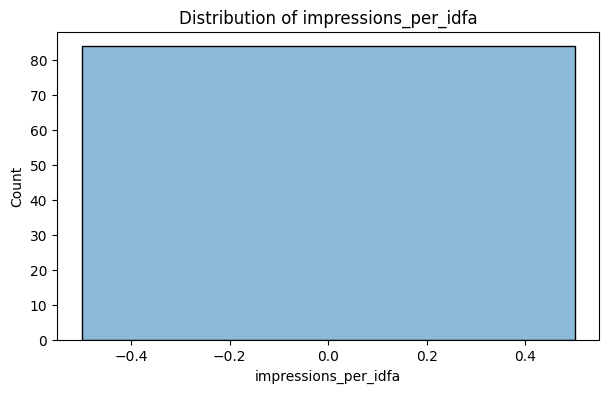

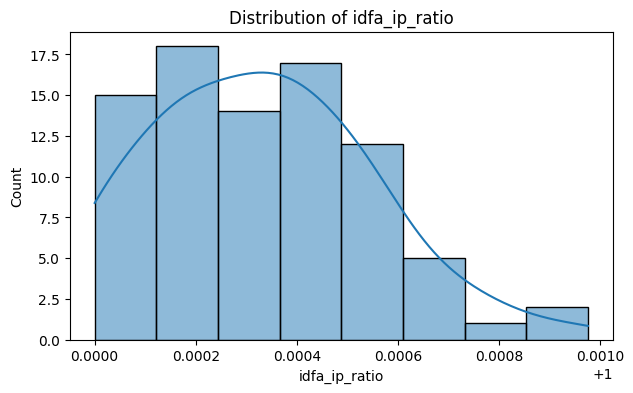

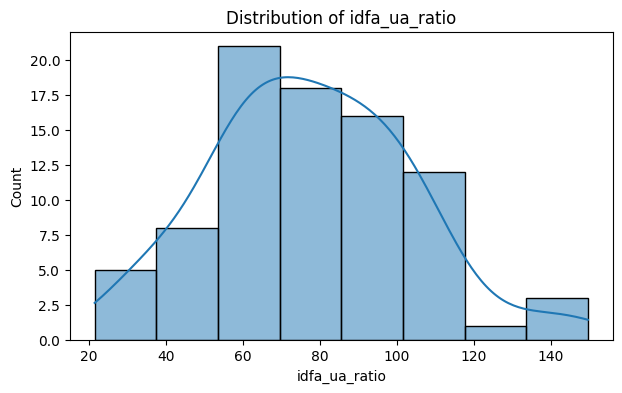

In [16]:
parameters = ['requests_per_idfa', 'impressions_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio']

for i in parameters:
    plt.figure(figsize=(7,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

# Observations
* requests_per_idfa: The distribution is centered around 1, indicating a normal pattern of low requests per unique device, typical of legitimate traffic.

* impressions_per_idfa: This plot is consistently at 0, indicating that despite requests, no ad impressions are being served per unique device, which is unusual.

* idfa_ip_ratio: The ratio of unique devices to unique IP addresses is tightly clustered around 1, indicating a normal relationship between devices and IPs.

* idfa_ua_ratio: This plot displays significant spikes and high values, indicating anomalies where many unique devices share a limited number of User-Agents, suggesting potential device spoofing.

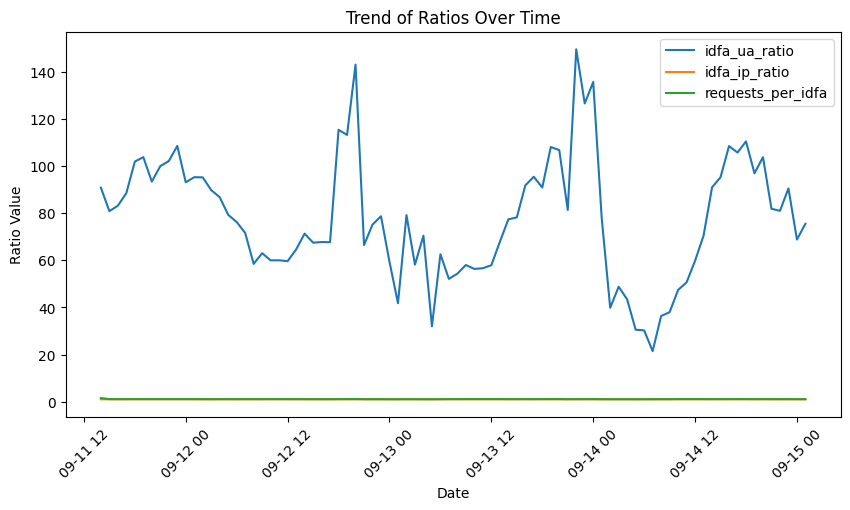

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['idfa_ua_ratio'], label='idfa_ua_ratio')
plt.plot(df['Date'], df['idfa_ip_ratio'], label='idfa_ip_ratio')
plt.plot(df['Date'], df['requests_per_idfa'], label='requests_per_idfa')
plt.legend()
plt.title("Trend of Ratios Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio Value")
plt.xticks(rotation=45)
plt.show()

* The line plot shows the idfa_ua_ratio with clear spikes over time, while idfa_ip_ratio and requests_per_idfa remain relatively stable.

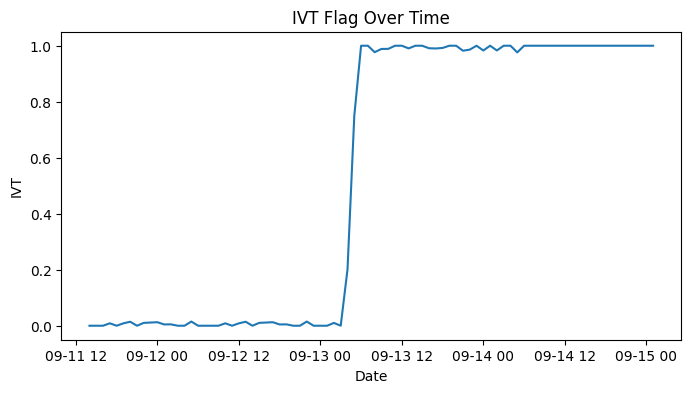

In [19]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Date', y='IVT')
plt.title("IVT Flag Over Time")
plt.show()

* Fluctuations in the IVT flag with peaks that visually correspond to the spikes in the idfa_ua_ratio trend plot.

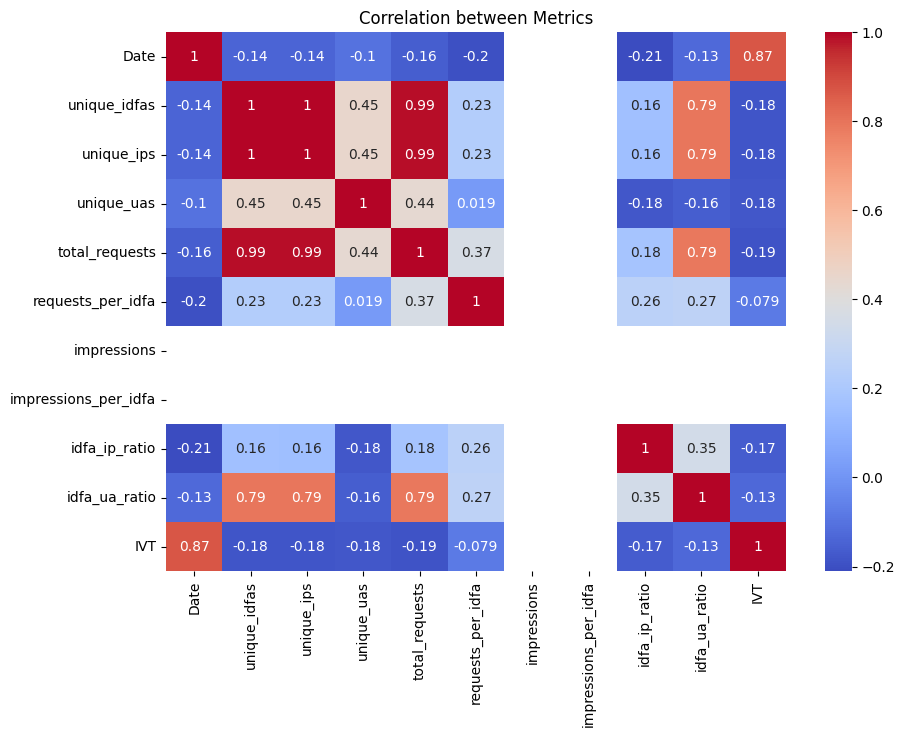

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Metrics")
plt.show()

* Strong positive correlation between idfa_ua_ratio and the IVT flag, confirming that a high idfa_ua_ratio is strongly associated with being flagged as IVT.

### Graph-Based Insights

* Requests per IDFA: Mostly stable around 1, suggesting normal, low requests per device.

* Impressions per IDFA: Flat at 0, indicating ads are not being served despite requests.

* IDFA-IP Ratio: Around 1, indicating a normal relationship between devices and IPs

* IDFA-UA Ratio: Shows large spikes in IVT apps, a clear signal for detection.

* IVT Trend: Peaks align with high IDFA-UA ratio, showing a strong visual correlation between device spoofing and IVT marking.

##### Conclusion

The analysis indicates that the IVT detection system primarily flags apps exhibiting irregular or unnatural traffic behavior. Key indicators include high concentrations of devices sharing the same User-Agent, sudden spikes in ad requests without corresponding impressions, and abrupt fluctuations in traffic metrics. Apps with consistent and balanced traffic patterns, reflected in low IDFA-to-User-Agent ratios, tend to avoid IVT classification. Conversely, those showing clustered or erratic activity are flagged as IVT either early or late depending on when these anomalies arise.